In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape,len(train_labels),train_labels

((60000, 28, 28), 60000, array([9, 0, 0, ..., 3, 0, 5], dtype=uint8))

In [6]:
test_images.shape,len(test_labels),test_labels

((10000, 28, 28), 10000, array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

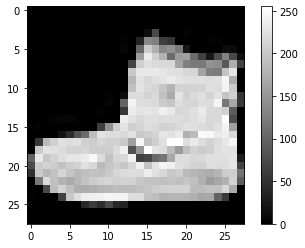

In [55]:
plt.figure()
plt.imshow(train_images[0],cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

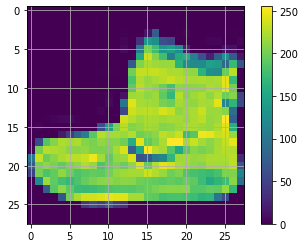

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [56]:
train_images = train_images / 255.0

test_images = test_images / 255.0

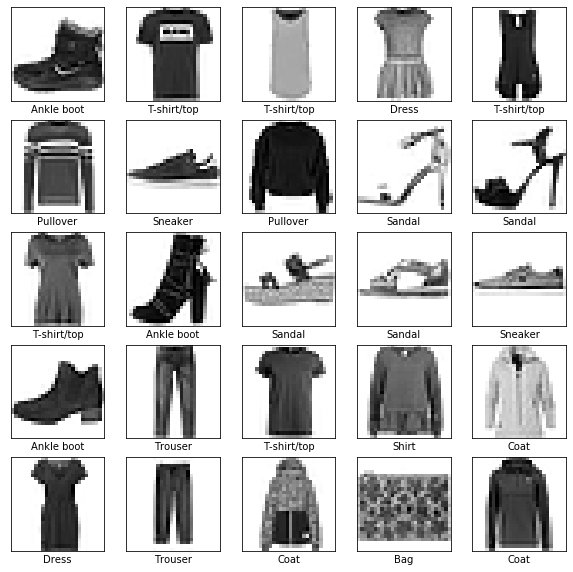

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.4732 - accuracy: 0.8366
Epoch 2/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.4579 - accuracy: 0.8430
Epoch 3/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.4478 - accuracy: 0.8465
Epoch 4/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.4513 - accuracy: 0.8466
Epoch 5/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.4470 - accuracy: 0.8470
Epoch 6/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.4486 - accuracy: 0.8469
Epoch 7/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.4524 - accuracy: 0.8467
Epoch 8/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.4446 - accuracy: 0.8493
Epoch 9/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.4413 - accuracy: 0.8508
Epoch

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 1s - loss: 0.3884 - accuracy: 0.8231

Test accuracy: 0.8231


In [16]:
predictions = model.predict(test_images)

In [18]:
predictions.shape

(10000, 10)

In [17]:
predictions[0]

array([6.8962449e-24, 2.7418449e-20, 0.0000000e+00, 4.4389814e-17,
       0.0000000e+00, 4.7377045e-03, 1.5677075e-34, 1.4520858e-02,
       7.3825839e-22, 9.8074144e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

In [21]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

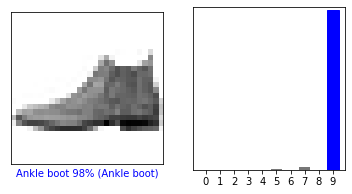

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

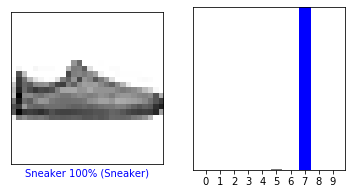

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

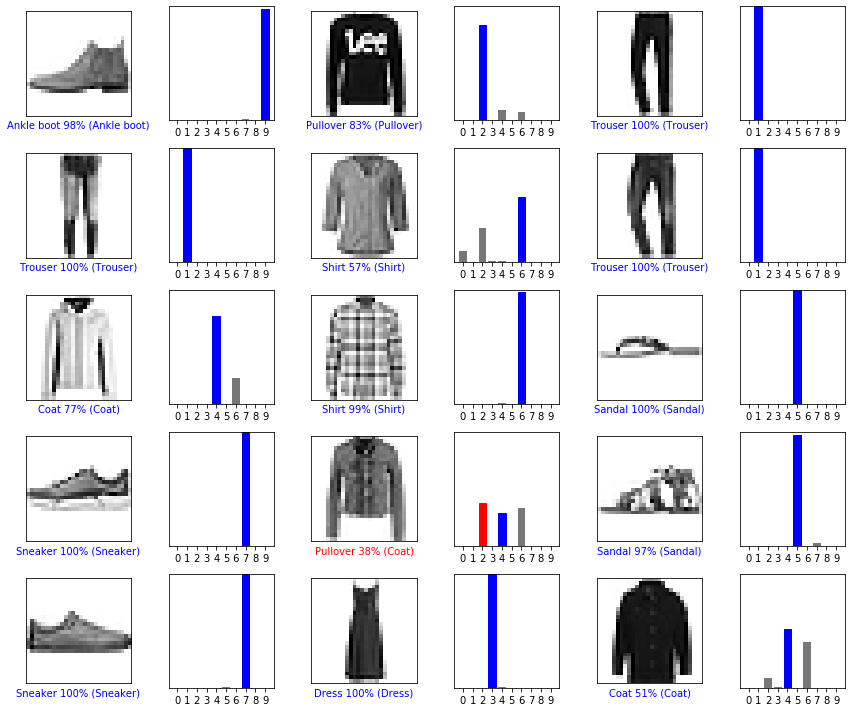

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [30]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [31]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [32]:
predictions_single = model.predict(img)

print(predictions_single)

[[5.3271153e-05 2.0912674e-05 8.3444422e-01 1.7333778e-05 9.0936355e-02
  1.0758285e-25 7.4527912e-02 0.0000000e+00 4.7100919e-09 0.0000000e+00]]


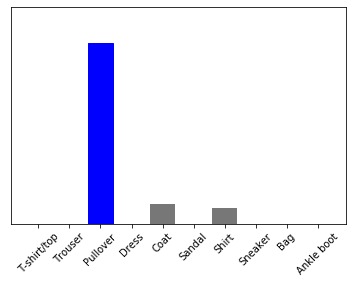

In [33]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [34]:
np.argmax(predictions_single[0])

2

# 尝试残差

In [42]:
fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [30]:
from tensorflow.keras.layers import BatchNormalization,Conv2D,Input,ZeroPadding2D,MaxPooling2D,AveragePooling2D,add,Flatten,Dense
from tensorflow.keras.models import Model

In [16]:
def Conv2d_BN(x, nb_filter,kernel_size, strides=(1,1), padding='same',name=None):
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None
 
    x = Conv2D(nb_filter,kernel_size,padding=padding,strides=strides,activation='relu',name=conv_name)(x)
    x = BatchNormalization(axis=3,name=bn_name)(x)
    return x
 
def Conv_Block(inpt,nb_filter,kernel_size,strides=(1,1), with_conv_shortcut=False):
    x = Conv2d_BN(inpt,nb_filter=nb_filter[0],kernel_size=(1,1),strides=strides,padding='same')
    x = Conv2d_BN(x, nb_filter=nb_filter[1], kernel_size=(3,3), padding='same')
    x = Conv2d_BN(x, nb_filter=nb_filter[2], kernel_size=(1,1), padding='same')
    if with_conv_shortcut:
        shortcut = Conv2d_BN(inpt,nb_filter=nb_filter[2],strides=strides,kernel_size=kernel_size)
        x = add([x,shortcut])
        return x
    else:
        x = add([x,inpt])
    return x

In [28]:
# inpt = Input(shape=(224,224,3))
# x = ZeroPadding2D((3,3))(inpt) # 230
# x = Conv2d_BN(x,nb_filter=64,kernel_size=(7,7),strides=(2,2),padding='valid') # 112
# x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x) # 56
 
# x = Conv_Block(x,nb_filter=[64,64,256],kernel_size=(3,3),strides=(1,1),with_conv_shortcut=True)
# x = Conv_Block(x,nb_filter=[64,64,256],kernel_size=(3,3))
# x = Conv_Block(x,nb_filter=[64,64,256],kernel_size=(3,3))
 
# x = Conv_Block(x,nb_filter=[128,128,512],kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True) # 28
# x = Conv_Block(x,nb_filter=[128,128,512],kernel_size=(3,3))
# x = Conv_Block(x,nb_filter=[128,128,512],kernel_size=(3,3))
# x = Conv_Block(x,nb_filter=[128,128,512],kernel_size=(3,3))
 
# x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True) # 14
# x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
# x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
# x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
# x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
# x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
 
# x = Conv_Block(x,nb_filter=[512,512,2048],kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True)# 7
# x = Conv_Block(x,nb_filter=[512,512,2048],kernel_size=(3,3))
# x = Conv_Block(x,nb_filter=[512,512,2048],kernel_size=(3,3))
# x = AveragePooling2D(pool_size=(7,7))(x)
# x = Flatten()(x)
# x = Dense(1000,activation='softmax')(x)
# model = Model(inputs=inpt,outputs=x)
# model.summary()

In [48]:
inpt = Input(shape=(28,28,1))
x = ZeroPadding2D((1,1))(inpt) # 30
x = Conv2d_BN(x,nb_filter=32,kernel_size=(3,3),strides=(2,2),padding='valid') # 14
# x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x) # 56
 
# x = Conv_Block(x,nb_filter=[64,64,256],kernel_size=(3,3),strides=(1,1),with_conv_shortcut=True)
# x = Conv_Block(x,nb_filter=[64,64,256],kernel_size=(3,3))
# x = Conv_Block(x,nb_filter=[64,64,256],kernel_size=(3,3))
 
# x = Conv_Block(x,nb_filter=[128,128,512],kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True) # 28
# x = Conv_Block(x,nb_filter=[128,128,512],kernel_size=(3,3))
# x = Conv_Block(x,nb_filter=[128,128,512],kernel_size=(3,3))
# x = Conv_Block(x,nb_filter=[128,128,512],kernel_size=(3,3))
 
x = Conv_Block(x,nb_filter=[32,32,64],kernel_size=(3,3),strides=(1,1),with_conv_shortcut=True) # 15
# x 64
x = Conv_Block(x,nb_filter=[32,32,64],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[32,32,64],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[32,32,64],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[32,32,64],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[32,32,64],kernel_size=(3,3))
# x 64 -> 128
x = Conv_Block(x,nb_filter=[64,64,128],kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True)# 7
x = Conv_Block(x,nb_filter=[64,64,128],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[64,64,128],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[64,64,128],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[64,64,128],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[64,64,128],kernel_size=(3,3))
# x 128 -> 256
x = Conv_Block(x,nb_filter=[128,128,256],kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True)# 4
x = Conv_Block(x,nb_filter=[128,128,256],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[128,128,256],kernel_size=(3,3))

x = AveragePooling2D(pool_size=(4,4))(x)
x = Flatten()(x)
x = Dense(10,activation='softmax')(x)

In [49]:
model = Model(inputs=inpt,outputs=x)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_9 (ZeroPadding2D (None, 30, 30, 1)    0           input_11[0][0]                   
__________________________________________________________________________________________________
conv2d_261 (Conv2D)             (None, 14, 14, 32)   320         zero_padding2d_9[0][0]           
__________________________________________________________________________________________________
batch_normalization_261 (BatchN (None, 14, 14, 32)   128         conv2d_261[0][0]                 
____________________________________________________________________________________________

In [50]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10,validation_split=0.2,batch_size=256)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 27s 572us/sample - loss: 0.5597 - accuracy: 0.7964 - val_loss: 3.7456 - val_accuracy: 0.1714
Epoch 2/10
48000/48000 [==============================] - 18s 384us/sample - loss: 0.3270 - accuracy: 0.8813 - val_loss: 4.6362 - val_accuracy: 0.1441
Epoch 3/10
48000/48000 [==============================] - 18s 385us/sample - loss: 0.2632 - accuracy: 0.9015 - val_loss: 0.8819 - val_accuracy: 0.7470
Epoch 4/10
48000/48000 [==============================] - 18s 385us/sample - loss: 0.2197 - accuracy: 0.9193 - val_loss: 0.3051 - val_accuracy: 0.8881
Epoch 5/10
48000/48000 [==============================] - 18s 385us/sample - loss: 0.1873 - accuracy: 0.9305 - val_loss: 0.3239 - val_accuracy: 0.8871
Epoch 6/10
48000/48000 [==============================] - 18s 385us/sample - loss: 0.1643 - accuracy: 0.9380 - val_loss: 0.3377 - val_accuracy: 0.8863
Epoch 7/10
48000/48000 [====================